In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#loading the dataset
cancer=pd.read_csv('cancer.csv')
lb=LabelEncoder()
cancer.iloc[:,1]=lb.fit_transform(cancer.iloc[:,1].values)

<ipython-input-4-099b2ce03744>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cancer.iloc[:,1]=lb.fit_transform(cancer.iloc[:,1].values)


In [ ]:
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer.drop(["id","Unnamed: 32"],axis=1,inplace=True)


In [ ]:
cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
cancer.shape

(569, 31)

In [ ]:
X=cancer.drop(columns='diagnosis',axis=1)
Y=cancer['diagnosis']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=2)

In [ ]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit(X_test)

In [ ]:
X_train.shape

(455, 30)

**Breast cancer with deep neural network**

In [ ]:
#importing tensor flow
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

# **setting up the layers of Neural network**

In [ ]:
# Creating the model
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,)),# First input layer  and flatten means to cobnvert  matrix into one Dimensional array
    tf.keras.layers.Dense(30,activation='relu'),# Hidden layer
    tf.keras.layers.Dense(2,activation='sigmoid'), # ouput layer 2 because we have two classes i.e M or B
])

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training Neural network
hisotry=model.fit(X_train_std,Y_train,validation_split=0.1,epochs=70)

Epoch 1/70
13/13 [==============================] - 1s 20ms/step - loss: 0.7719 - accuracy: 0.4597 - val_loss: 0.5667 - val_accuracy: 0.8043
Epoch 2/70
13/13 [==============================] - 0s 5ms/step - loss: 0.4605 - accuracy: 0.8411 - val_loss: 0.3658 - val_accuracy: 0.9783
Epoch 3/70
13/13 [==============================] - 0s 7ms/step - loss: 0.3284 - accuracy: 0.9193 - val_loss: 0.2740 - val_accuracy: 0.9783
Epoch 4/70
13/13 [==============================] - 0s 6ms/step - loss: 0.2609 - accuracy: 0.9291 - val_loss: 0.2227 - val_accuracy: 0.9783
Epoch 5/70
13/13 [==============================] - 0s 6ms/step - loss: 0.2176 - accuracy: 0.9389 - val_loss: 0.1919 - val_accuracy: 0.9783
Epoch 6/70
13/13 [==============================] - 0s 6ms/step - loss: 0.1878 - accuracy: 0.9462 - val_loss: 0.1702 - val_accuracy: 0.9783
Epoch 7/70
13/13 [==============================] - 0s 7ms/step - loss: 0.1668 - accuracy: 0.9535 - val_loss: 0.1548 - val_accuracy: 0.9783
Epoch 8/70
13/13 [=

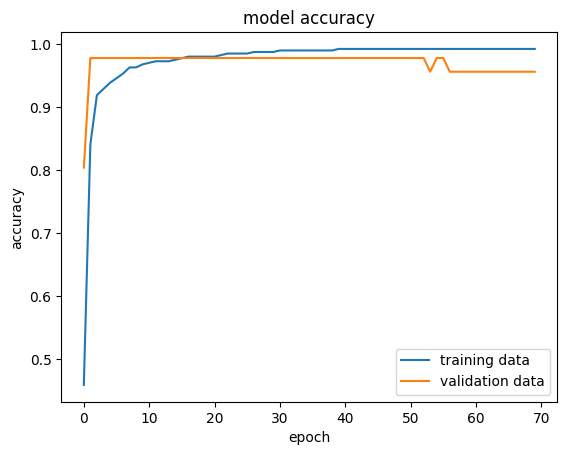

In [ ]:
#visualizing accuracy

plt.plot(hisotry.history['accuracy'])
plt.plot(hisotry.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'])





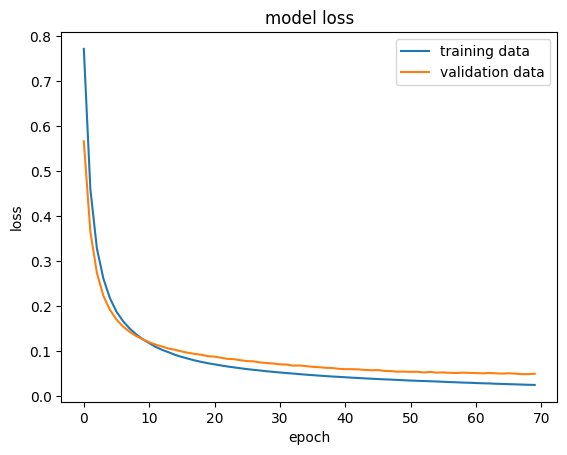

In [ ]:
#visualizing  losss
plt.plot(hisotry.history['loss'])
plt.plot(hisotry.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data','validation data'])

In [36]:
tf.keras.Model.save

<function keras.src.engine.training.Model.save(self, filepath, overwrite=True, save_format=None, **kwargs)>